### Import the appropriate modules 

In [48]:
import pandas as pd
import os

### Load in the Data as a Pandas Data Frame

In [49]:
os.chdir('C:\\Users\\MITALI\\Desktop\\courses\\Fall17\\Python')
bball=pd.read_csv('Batting.csv')

### What are the dimensions of the data?

In [50]:
bball.shape

(102816, 25)

### Add a column to the data frame that combines nameLast and nameFirst, entitle this playerName.  
### You will be using this column extensively

In [192]:
bball['playerName']=bball['nameFirst']+" "+bball['nameLast']
bball.head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,playerName,Average,Age
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0,0.0,NaN,NaN,NaN,NaN,NaN,Frank Abercrombie,0.000000,21
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,4,0.0,NaN,NaN,NaN,NaN,NaN,Bob Addy,0.271186,29
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,2,5.0,NaN,NaN,NaN,NaN,NaN,Art Allison,0.291971,22
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,0,2.0,NaN,NaN,NaN,NaN,NaN,Doug Allison,0.330827,25
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,2,1.0,NaN,NaN,NaN,NaN,NaN,Cap Anson,0.325000,19


### How many players appeared in 1880?  Required: Count of players

In [52]:
bball[bball['yearID']==1880]['playerID'].nunique()

127

### Which five years had the most players appear? Required: Year and count of players

In [267]:
plcount=bball[['yearID','playerID']].copy()
#df={'yearID','playerID','player count'}
#df['yearID']=bball['yearID'].copy()
#df['playerID'].append(bball['playerID'])
plcount.groupby(['yearID'])['playerID'].nunique().nlargest(5).reset_index(name="player count")


,yearID,player count
0,2016,1353
1,2015,1348
2,2014,1320
3,2013,1304
4,2011,1295


### How many players had over 500 or more ABs?  Required: Count of players

In [273]:
bball[bball['AB']>=500]['playerID'].nunique()

2241

### Which player had the most HRs in 1909?  Required: Player and HR total

In [251]:
hrt=bball[bball['yearID']==1909].groupby(['playerID']).sum().sort_values('HR',ascending=False).head(1)
#hrt['HR'].reset_index(name='HR Total')
hrt[['HR']]

,HR
playerID,
cobbty01,9


### How many players have had more than 200 hits, 20 2Bs, 5 3Bs, and 20 HRs in a season? 
### Required: Player, H, 2B, 3B, HR

In [256]:
plcs=bball.groupby(['yearID','playerID']).sum()
top_plcs=plcs[(plcs['H']>200) & (plcs['2B']>20) & (plcs['3B']>5) & (plcs['HR']>20)]
top_plcs[['H','2B','3B','HR']]

H  2B  3B  HR
yearID playerID                  
1921   hornsro01  235  44  18  21
       ruthba01   204  44  16  59
1922   hornsro01  250  46  14  42
1923   ruthba01   205  45  13  41
1924   hornsro01  227  43  14  25
1925   bottoji01  227  44  12  21
       hornsro01  203  41  10  39
       simmoal01  253  43  12  24
1927   gehrilo01  218  52  18  47
       hornsro01  205  32   9  26
1928   gehrilo01  210  47  13  27
1929   alexada01  215  43  15  25
       fredejo01  206  52   6  24
       hermaba01  217  42  13  21
       hornsro01  229  47   8  39
       kleinch01  219  45   6  43
       odoulle01  254  35   6  32
       simmoal01  212  41   9  34
1930   gehrilo01  220  42  17  41
       hermaba01  241  48  11  35
       kleinch01  250  59   8  40
       lindsfr01  231  39   7  22
       morgaed01  204  47  11  26
       odoulle01  202  37   7  22
       reynoca01  202  25  18  22
       simmoal01  211  41  16  36
       terrybi01  254  39  15  23
       wilsoha01  208  35   6  56
1931   averiea01  209  36  10  32
       gehrilo01  211  31  15  46
...               ...  ..  ..  ..
1964   olivato01  217  43   9  32
1965   pinsova01  204  34  10  22
       willibi01  203  39   6  34
1966   aloufe01   218  32   6  31
       clemero01  202  31  11  29
1967   brocklo01  206  32  12  21
       clemero01  209  26  10  23
1970   olivato01  204  36   7  23
       torrejo01  203  27   9  21
1971   torrejo01  230  34   8  24
1977   parkeda01  215  44   8  21
       riceji01   206  29  15  39
1978   garvest01  202  36   9  21
       riceji01   213  25  15  46
1979   brettge01  212  42  20  23
       riceji01   201  39   6  39
1982   yountro01  210  46  12  29
1986   puckeki01  223  37   6  31
1996   burksel01  211  45   8  40
       grissma02  207  32  10  23
1997   garcino01  209  44  11  30
1998   guerrvl01  202  37   7  38
1999   jeterde01  219  37   9  24
       willibe02  202  28   6  25
2000   erstada01  240  39   6  25
2004   youngmi02  216  33   9  22
2007   hollima01  216  50   6  36
       ramirha01  212  48   6  29
       rolliji01  212  38  20  30
2009   braunry02  203  39   6  32

[91 rows x 4 columns]

### Who had the highest batting average in 2009?  Required: Player, Average, and HRs for that player.  
### Hint:  Batting Average is H/AB

In [257]:
bball['Average']=bball['H']/bball['AB']
avgbat=bball[['playerID','playerName','yearID','Average','HR']]
avgbat[avgbat['yearID']==2009].groupby('playerID').sum().sort_values('Average',ascending=False).head(6)

,yearID,Average,HR
playerID,,,
gonzaed01,2009,1.0,0
corpoca01,2009,1.0,0
matosos01,2009,1.0,0
chenbr01,2009,1.0,0
davidda01,2009,1.0,0
baezda01,2009,1.0,0


### What was the average amount of HRs for all players in 1975 who had 200 or more ABs?

In [159]:
avgHR=bball[(bball['yearID']==1975) & (bball['AB']>=200)]
avg=(avgHR['HR'].sum())/(avgHR['playerID'].nunique())
avg

9.472440944881889

### Same question as above but for players in 1987 with 400 or more ABs?

In [162]:
avgHR2=bball[(bball['yearID']==1987) & (bball['AB']>=400)]
avgHR2=(avgHR2['HR'].sum())/(avgHR2['playerID'].nunique())
avgHR2
#avgHR2[['playerID','playerName','yearID','AB','HRavg']]

19.006410256410255

### In 1984, who had the top 5 highest batting averages?

In [60]:
bball[bball['yearID']==1984].sort_values('Average',ascending=False).head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,playerName,Average
61940,quirkja01,Jamie,Quirk,1954,1984,2,CLE,AL,1,1,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Jamie Quirk,1.000000
62171,vonohda01,Dave,Von Ohlen,1958,1984,1,SLN,NL,27,1,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Dave Von Ohlen,1.000000
61526,forstte01,Terry,Forster,1952,1984,1,ATL,NL,25,3,...,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,Terry Forster,0.666667
62079,smithza01,Zane,Smith,1960,1984,1,ATL,NL,3,9,...,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,Zane Smith,0.555556
61721,lagami01,Mike,Laga,1960,1984,1,DET,AL,9,11,...,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,Mike Laga,0.545455


### In 1963, who had the 5 lowest batting averages for players with 400 or more ABs?

In [61]:
bball[(bball['yearID']==1963) & (bball['AB']>=400)].sort_values('Average',ascending=True).head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,playerName,Average
43106,lillibo01,Bob,Lillis,1930,1963,1,HOU,NL,147,469,...,4.0,15,35.0,1.0,4.0,7.0,1.0,8.0,Bob Lillis,0.198294
42969,gossho01,Howie,Goss,1934,1963,1,HOU,NL,133,411,...,6.0,31,128.0,2.0,0.0,4.0,2.0,3.0,Howie Goss,0.209246
42747,batemjo01,John,Bateman,1940,1963,1,HOU,NL,128,404,...,0.0,13,103.0,1.0,9.0,4.0,4.0,9.0,John Bateman,0.210396
42732,asprobo01,Bob,Aspromonte,1938,1963,1,HOU,NL,136,468,...,1.0,40,57.0,4.0,1.0,3.0,2.0,15.0,Bob Aspromonte,0.213675
43438,winebo01,Bobby,Wine,1938,1963,1,PHI,NL,142,418,...,3.0,14,83.0,5.0,1.0,6.0,2.0,11.0,Bobby Wine,0.215311


### Which years had the most 2Bs?  Top 5

In [62]:
top=bball[['yearID','2B']]
top.groupby(['yearID'])['2B'].sum().nlargest(5).reset_index(name='2B Count')

,yearID,2B Count
0,2007,9197
1,2006,9135
2,2008,9014
3,2004,8919
4,2000,8901


### Who has the most 3Bs for their career?

In [198]:
top3B=bball[['playerID','playerName','3B']]
top3B.groupby(['playerID'])['3B'].sum().nlargest(1).reset_index(name='3B Count')

,playerID,3B Count
0,crawfsa01,309


### Who had the most HRs in their 20s (Aged 29 or less)?

In [285]:
topHR=bball
topHR['Age']=bball['yearID']-bball['birthYear']
disp=topHR[(topHR['Age']>=20) & (topHR['Age']<=29)].sort_values('HR',ascending=False).head(1)
disp[['playerID','playerName','HR','Age']]

,playerID,playerName,HR,Age
41661,marisro01,Roger Maris,61,27


### Who had the most 2Bs, 3Bs, and HRs combined in one season?

In [260]:
bball['collective']=bball['2B']+bball['3B']+bball['HR']
bball.groupby(['yearID','playerID']).sum().sort_values('collective',ascending=False).head(1)

,,birthYear,stint,G,AB,R,H,2B,3B,HR,RBI,...,SO,IBB,HBP,SH,SF,GIDP,Average,Age,collective,OBP
yearID,playerID,,,,,,,,,,,,,,,,,,,,,
1921,ruthba01,1895,1,152,540,177,204,44,16,59,171.0,...,81.0,NaN,4.0,4.0,NaN,NaN,0.377778,26,119,NaN


### Which team has had the most players with 100 or more RBIs in a season?

In [286]:
plyr=bball.groupby(['yearID','teamID','playerID'])['RBI'].sum().reset_index(name='add').sort_values('add',ascending=False)
highplyr=plyr[plyr['add']>=100]
highplyr.groupby(['yearID','teamID'])['playerID'].count().reset_index(name='count').sort_values('count',ascending=False).head(3)

,yearID,teamID,count
285,1936,NYA,5
49,1894,BSN,5
47,1894,BLN,5


### How many players have played 100 or more games from 1900 on?

In [283]:
game=bball[bball['yearID']>=1900]
cnt=game.groupby('playerID')['G'].sum().reset_index(name='Gamecount')
len(cnt[cnt['Gamecount']>=100])
#game[(game['yearID']>=1990)]['playerID'].nunique()

8092

### Who scored the most runs in 1938?

In [220]:
maxruns=bball[bball['yearID']==1938]
runs=maxruns.groupby(['playerID','playerName'])['R'].sum().reset_index(name='runs')
runs.sort_values('runs',ascending=False).head(1)

,playerID,playerName,runs
168,greenha01,Hank Greenberg,144


### In 2012 did anyone have at least 20 2Bs, 10 3Bs, 10 HRs, and 10 SBs?  If so, who were they?

In [265]:
atleast=bball[bball['yearID']==2012]
at=atleast.groupby('playerID').sum()
at2=at[(at['2B']>=20) & (at['3B']>=10) & (at['HR']>=10) & (at['SB']>=10)]
at2[['2B','3B','HR','SB']]

,2B,3B,HR,SB
playerID,,,,
cabreme01,25,10,11,13.0
castrst01,29,12,14,25.0
jacksau01,29,10,16,12.0
reyesjo01,37,12,11,40.0


### Create a column that calculates OBP (on base percentage)
### Formula: OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies + Sacrifice Hits).

In [233]:
bball['OBP']=(bball['H']+bball['BB']+bball['HBP'])/(bball['AB']+bball['BB']+bball['HBP']+bball['SF']+bball['SH'])
bball.head(10)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,IBB,HBP,SH,SF,GIDP,playerName,Average,Age,collective,OBP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,NaN,NaN,NaN,NaN,NaN,Frank Abercrombie,0.000000,21,0,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,NaN,NaN,NaN,NaN,NaN,Bob Addy,0.271186,29,6,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,NaN,NaN,NaN,NaN,NaN,Art Allison,0.291971,22,9,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,NaN,NaN,NaN,NaN,NaN,Doug Allison,0.330827,25,14,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,NaN,NaN,NaN,NaN,NaN,Cap Anson,0.325000,19,14,NaN
5,armstbo01,Robert,Armstrong,1850,1871,1,FW1,NaN,12,49,...,NaN,NaN,NaN,NaN,NaN,Robert Armstrong,0.224490,21,3,NaN
6,barkeal01,Al,Barker,1839,1871,1,RC1,NaN,1,4,...,NaN,NaN,NaN,NaN,NaN,Al Barker,0.250000,32,0,NaN
7,barnero01,Ross,Barnes,1850,1871,1,BS1,NaN,31,157,...,NaN,NaN,NaN,NaN,NaN,Ross Barnes,0.401274,21,19,NaN
8,barrebi01,Bill,Barrett,0,1871,1,FW1,NaN,1,5,...,NaN,NaN,NaN,NaN,NaN,Bill Barrett,0.200000,1871,1,NaN
9,barrofr01,Frank,Barrows,1844,1871,1,BS1,NaN,18,86,...,NaN,NaN,NaN,NaN,NaN,Frank Barrows,0.151163,27,3,NaN


### For all players with 500 or more ABs which players had the top 5 OBPs in 2016?

In [290]:
top2=bball[bball['yearID']==2016]
#top2=top.groupby('playerID').sum()
top2[top2['AB']>=500].sort_values('OBP',ascending=False).head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,IBB,HBP,SH,SF,GIDP,playerName,Average,Age,collective,OBP
102697,troutmi01,Mike,Trout,1991,2016,1,LAA,AL,159,549,...,12.0,11.0,0.0,5.0,5.0,Mike Trout,0.315118,25,66,0.440529
102740,vottojo01,Joey,Votto,1983,2016,1,CIN,NL,158,556,...,15.0,5.0,0.0,8.0,16.0,Joey Votto,0.325540,33,65,0.434269
102077,lemahdj01,DJ,LeMahieu,1988,2016,1,COL,NL,146,552,...,2.0,3.0,8.0,6.0,19.0,DJ LeMahieu,0.347826,28,51,0.411024
101826,goldspa01,Paul,Goldschmidt,1987,2016,1,ARI,NL,158,579,...,15.0,7.0,0.0,8.0,14.0,Paul Goldschmidt,0.297064,29,60,0.410511
101680,donaljo02,Josh,Donaldson,1985,2016,1,TOR,AL,155,577,...,6.0,9.0,2.0,3.0,16.0,Josh Donaldson,0.284229,31,74,0.402857


### Who had the highest OBP of all time?  Required: Player has to have had at least 500 ABs and 30 HRs.  Top 5.

In [175]:
high=bball[(bball['AB']>=500) & (bball['HR']>=30)].sort_values('OBP',ascending=False).head(5)
high[['playerID','playerName','yearID','AB','HR','OBP']]

,playerID,playerName,yearID,AB,HR,OBP
41359,cashno01,Norm Cash,1961,535,41,0.485119
81054,giambja01,Jason Giambi,2001,520,38,0.476900
79668,giambja01,Jason Giambi,2000,510,43,0.475904
77389,mcgwima01,Mark McGwire,1998,509,70,0.469897
79550,delgaca01,Carlos Delgado,2000,569,41,0.469761


### Bonus: I would like a barchart depicting the total amount of HRs by year

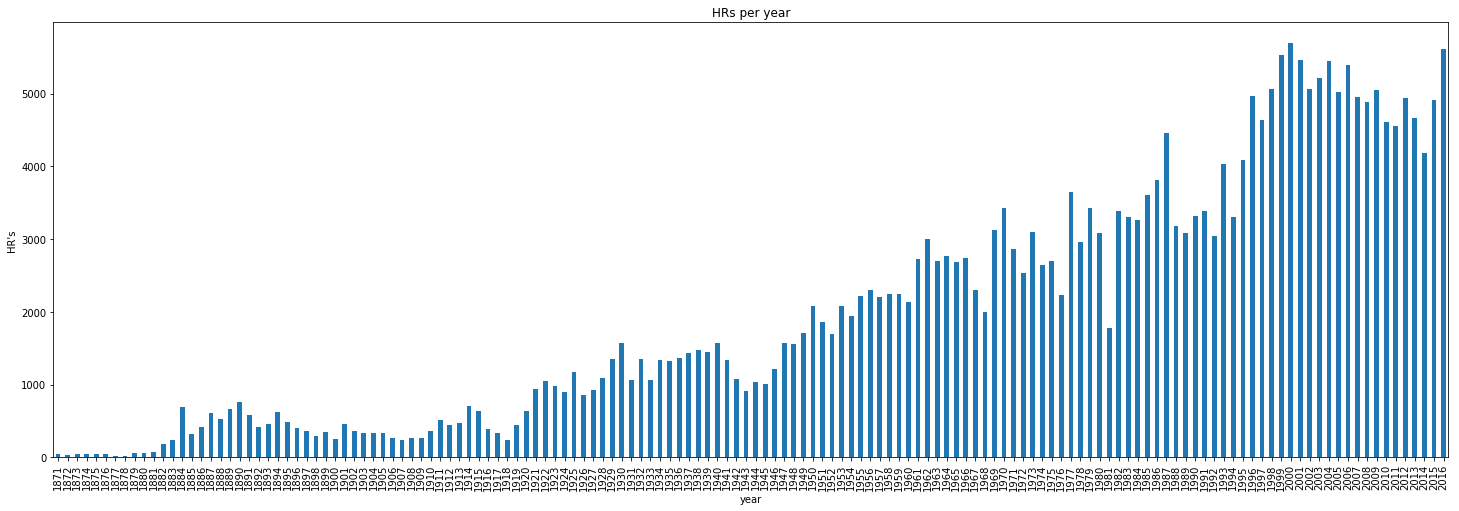

In [32]:
%matplotlib inline
import matplotlib as plt
graph=bball.groupby(['yearID'])['HR'].sum()
fig=graph.plot.bar(x='yearID',y='HR',title="HRs per year")
fig.figure.set_size_inches(25,8)
fig.set(xlabel="year",ylabel="HR's")
#fig.xlabel("Year",size=15)
#fig.ylabel("HR's",size=15)

### Bonus #2: I would like a line graph depicting the total amount of Ks per year

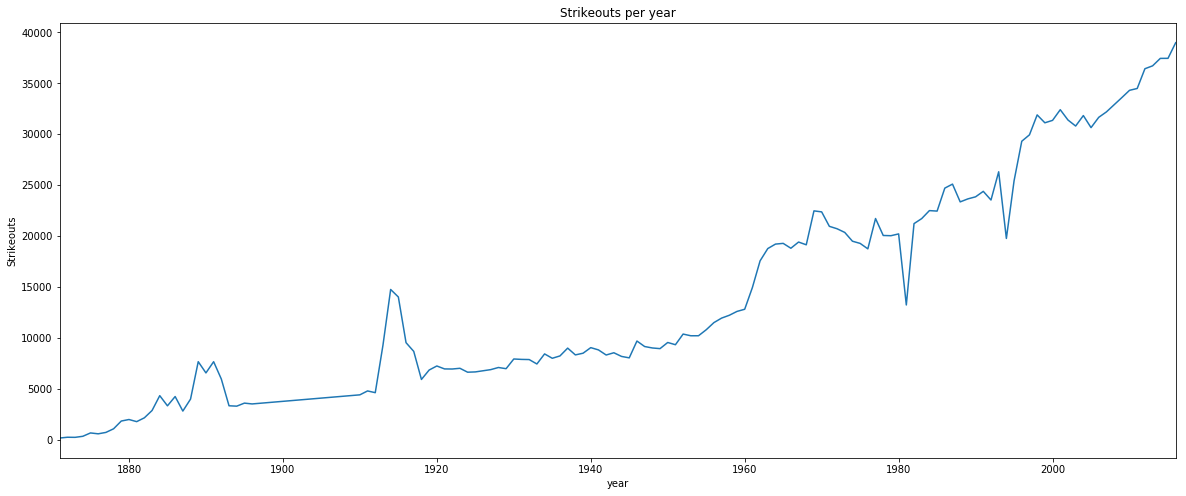

In [284]:
%matplotlib inline
yr=bball.groupby(['yearID'])['SO'].sum().dropna()
fig2=yr.plot.line(x='yearID',y='SO',title="Strikeouts per year")
fig2.figure.set_size_inches(20,8)
fig2.set(xlabel="year",ylabel="Strikeouts")